<a href="https://colab.research.google.com/github/Kusumita-Patra/IDEAS-TIH-Autumn-Internship/blob/main/Parkinsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Required Libraries**

In [15]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




**Extracting the dataset from UCI Repository**

In [16]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
data = pd.read_csv(url)


**Exploring the dataset**

In [17]:
X = data.drop(columns=["name", "status"])
y = data["status"]

#  Map target to descriptive labels
target_map = {0: "Healthy", 1: "Parkinsons"}
y_mapped = y.map(target_map)

# Combine for quick view
df = pd.concat([X, y_mapped.rename("status")], axis=1)
print("First 5 rows of the dataset:\n", df.head())


First 5 rows of the dataset:
    MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   Shimmer:DDA      NHR     HNR      RPDE   

**Dataset Information and Statistical Summary**

In [18]:
# Dataset info
print("\nDataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())
print("\nMissing Values:\n", df.isnull().sum())


Dataset Shape: (195, 23)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  RPD

**Pairplot(Top 5 Features)**

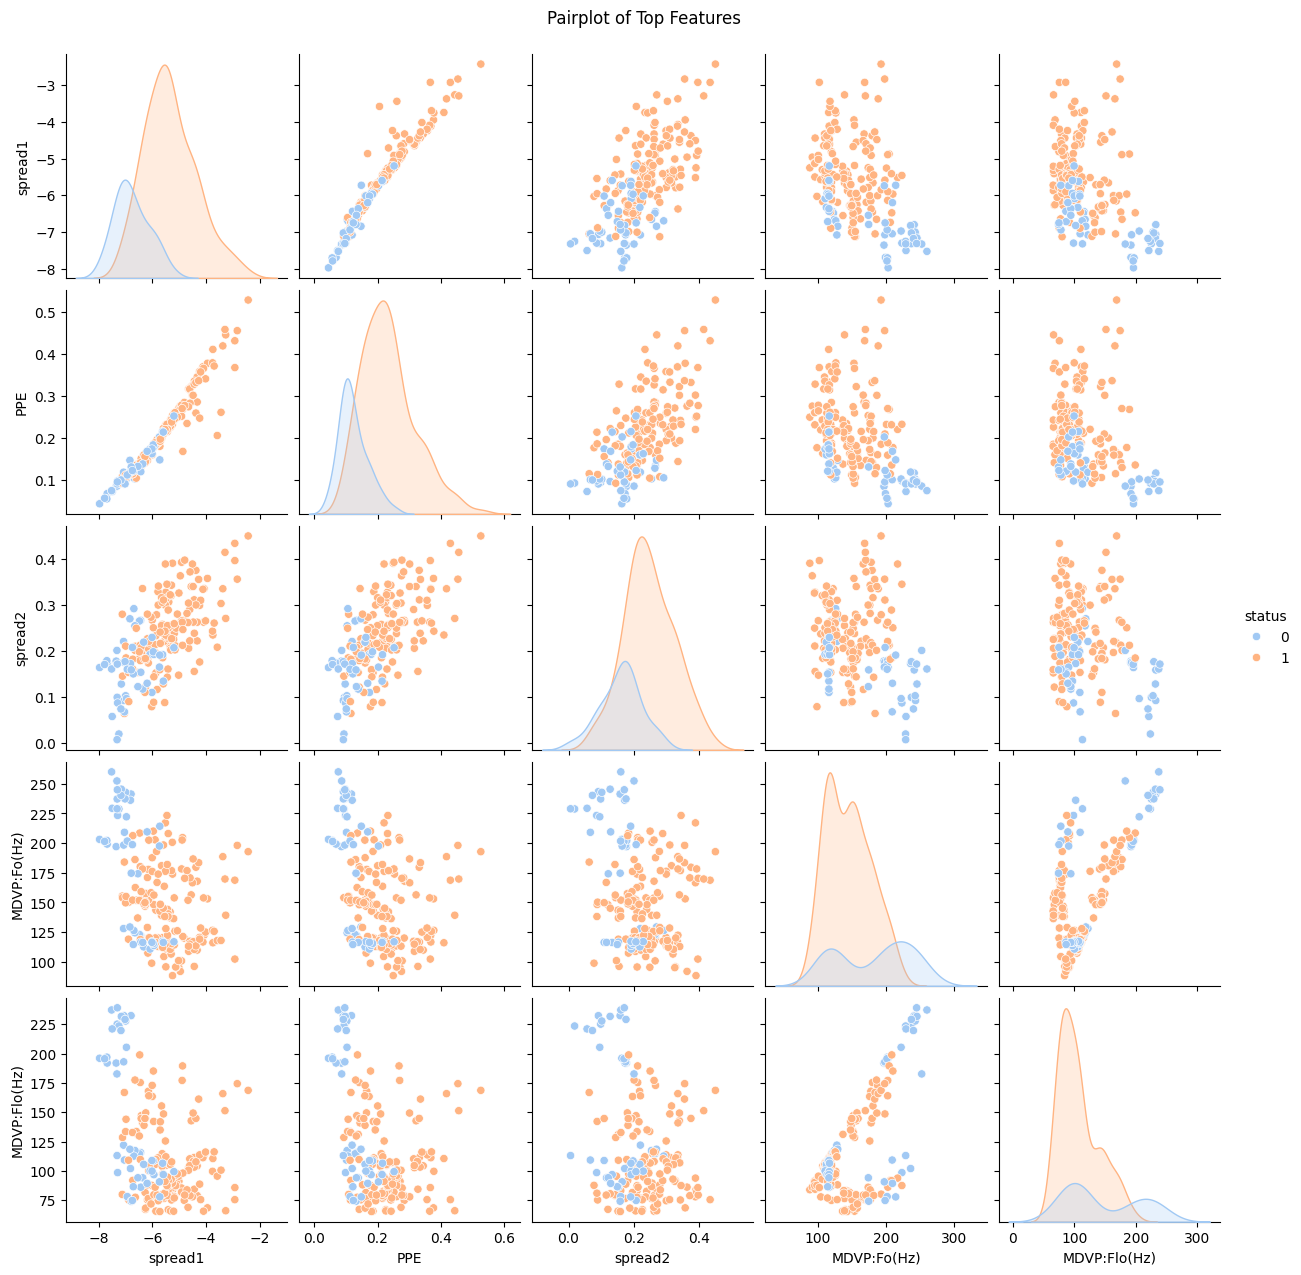

In [19]:
top_features = data.drop(columns=["name"]).corr()["status"].abs().sort_values(ascending=False).index[1:6]  # top 5 features
sns.pairplot(data, vars=top_features, hue="status", palette="pastel")
plt.suptitle("Pairplot of Top Features", y=1.02)
plt.show()

**Question 1**

 From the scatterplot/pairplot above which two features seem most useful for separating species?


 **Answer 1**


 From the above scatter plot the features which seem most useful for seperating species are -

 1. spread 1
 2. PPE

**Heatmap**

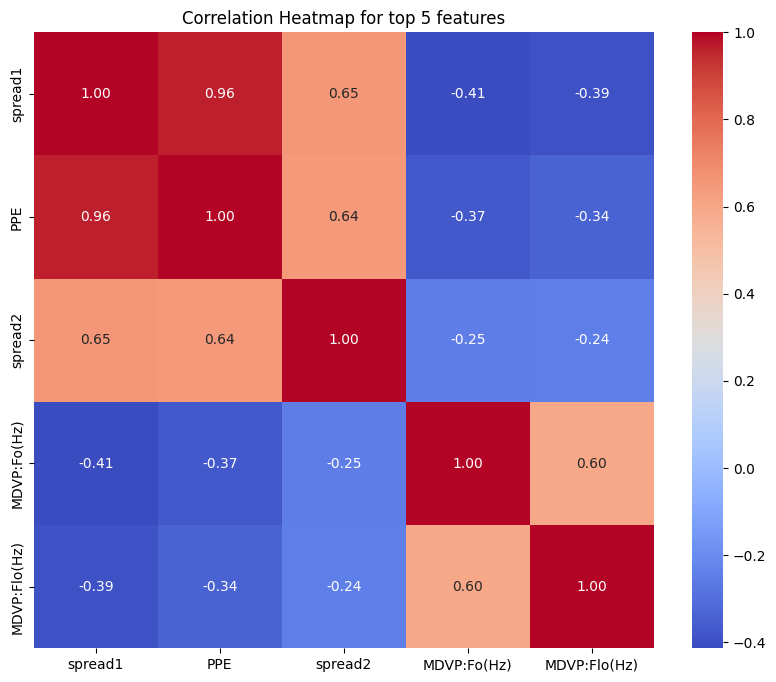

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(data[top_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap for top 5 features")
plt.show()

**Question 2**

Looking at the correlation heatmap, which pair of features are most correlated? What might this imply?

**Answer 2**

The highest correlation is between spread 1 and PPE with a correlation coefficient of 1.00

This implies:

1. This features are strongly positively correlated . They are redundant features.

2. The features are very powerful predictors  for classification.

**Spliting into features (X) and target (y)**

In [21]:
X = data.drop(columns=["name", "status"])
y = data["status"]

**Train-test split**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

 **Question 3**.

  Why do we split the dataset into training and testing sets?

**Answer 3**

We split a data set into training and testing sets to properly evaluate how well a machine learning model will perform on unseen data.

Training Set:

  It is used to teach the model patterns in the data. The model learns weights, rules, or structures from this set.

Testing Set:

It is kept aside and never shown duuring training. It is used only to check how well the trained model performs on new and unseen data. This simulates the rea world scenarios where the modal faces new inputs.

**Feature scaling**

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Logistic Regression**

Training:

In [24]:
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

Testing


--- Logistic Regression Results ---
Accuracy: 0.9230769230769231
Confusion Matrix:
 [[ 8  2]
 [ 1 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



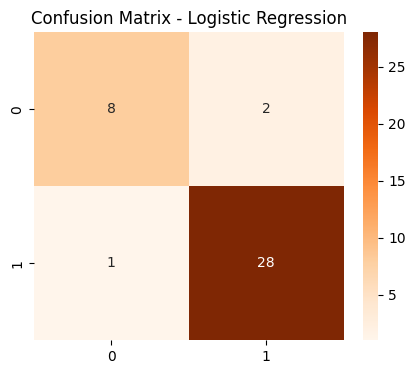

In [25]:
print("\n--- Logistic Regression Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

**Question 4.**

 Logistic Regression assumes a linear decision boundary. why?

**Answer 4**

Logistic regression is called "linear" because the decision boundary (where probabilities flip from one class to another) is in the linear feature space.

The sigmoid just maps the linear output into probabilities but doesn't make the bondary itself non linear.

**Question 5.**

Do you think this assumption holds for the Parkinson's dataset? Why or why not?

**Answer 5**

Logistic Regression performed well on the Parkinson's dataset, achieving good accuracy(~92%).

It is a linear model, so it works best if the relationship between features and the target (status) is approximately linear.

Because it is simple, it generalizes well and is less likely to overfit, especially on noisy data.

However, it may miss complex, nonlinear relationships in the dataset.

**Random Forest**

Training

In [26]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

Testing


--- Random Forest Results ---
Accuracy: 0.9230769230769231
Confusion Matrix:
 [[ 8  2]
 [ 1 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



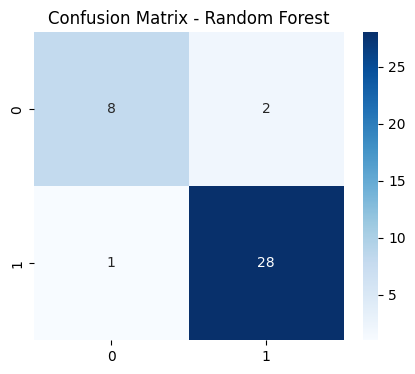

In [27]:
print("\n--- Random Forest Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

**Question 6**.

 If we increased the number of trees (n_estimators) in Random Forest, how might the performance change?

**Answer 6**

Increasing the number of trees in Random Forest generally improves stability and may slightly increase accuracy by reducing variance. However, after a certain point (typically a few hundred trees), the performance plateaus, so gains beyond that are negligible.

**Question 7**.

Between Logistic Regression and Random Forest, which model performed better? Why might that be?

**Answer 7**

Both Logistic Regression and Random Forest achieved the same accuracy of 92% on the Parkinson's dataset.

Logistic Regression worked well because the dataset is relatively small, balanced, and many features (like spread1, spread2, PPE) provide nearly linear separability.

Random Forest also performed strongly since it is an ensemble of decision trees that can capture non-linear relationships and feature interactions better than Logistic Regression.

However, Random Forest is more computationally expensive and may risk overfitting if not tuned properly, whereas Logistic Regression is simpler and easier to interpret.

Conclusion
In this case, both models performed equally well, but Random Forest offers more flexibility for capturing complex patterns, while Logistic Regression provides a faster, interpretable baseline.